# Project: Investigate the TMDb Movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have selected the TMDb dataset from Kaggle. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The success of particularmovie depends on various factors. In this project we would explore such factors and examine how they contribute to the success of the movie.

In [2]:
# Importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Loading the dataset as a dataframe
df = pd.read_csv('tmdb-movies.csv')

# Displaying first few records of the dataframe
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Displaying the shape of the dataframe
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])
print('------------------------------------------------------------------------------------')

# Displaying the information about the dataframe (including the numbe rof records in each column and the data type of each column)
print(df.info())
print('------------------------------------------------------------------------------------')

# Displaying some statistics (count, mean, standard deviation, five number summary) about the numeric columns of the dataframe
print(df.describe())
print('------------------------------------------------------------------------------------')

Number of rows:  10866
Number of columns:  21
------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 n

> From the information displayed about the dataframe, we can see that there are a total of 10866 rows, spread across the 21 features/ columns across the dataframe. Further, all the columns are non-null and are of specific datatype. There are four columns having data type float, six columns having data type integer, and eleven columns having data type object.

> From the statistical description of the data, we can see that for the popularity column it seems to have some outliers. But thinking logically, some movies do perform exceedingly well, and some perform really bad. So, I decided to not modify or treat the outliers, as I may loose some important insights by treating the outliers. For the budget and the revenue columns, we can see that, the minimum value, 25th percentile, and the 50th percentile, are all zeros, indicating that many values in these two columns are zeros. Practically thinking, it seems impossible for any movie to have either zero budget or zero revenue. So, these zeros might be just representing the missing data. Similarly, for the runtime column, the minimum value is zero, which is impossible for any movie, so it might be representing the missing value. For the release year column, we can see that the minimum value is 1960 and the maximum value is 2015. So, the dataset consists the data about the movies since 1960, upto 2015.

### Data Cleaning

> We first check, if there are any duplicate records in the dataset. We found that, there is one duplicate record in the dataset, so we dropped this duplicate record.

In [5]:
# Checking for duplicate records
sum(df.duplicated())

1

In [6]:
# Removing the duplicate entry
df.drop_duplicates(inplace = True)

# Checking for the number of records after removing the duplicates
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  10865
Number of columns:  21


In [7]:
# Dropping the unwanted columns
df.drop(['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj'], axis = 1, inplace = True)

# Checking for the number of records after removing the unwanted columns
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])
print('----------------------------------------------------------------')

# Displaying the first few rows of the dataframe
print(df.head())

Number of rows:  10865
Number of columns:  15
----------------------------------------------------------------
       id  popularity     budget     revenue                original_title  \
0  135397   32.985763  150000000  1513528810                Jurassic World   
1   76341   28.419936  150000000   378436354            Mad Max: Fury Road   
2  262500   13.112507  110000000   295238201                     Insurgent   
3  140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4  168259    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle .

> I decide to drop some columns: imdb_id, homepage, tagline, overview, budget_adj, and revenue_adj, as I think those won't be helpful in answering my research questions for this dataset. After, removing the duplicate records and the unwanted columns from the dataset, now the dataset consists of 10865 rows and 15 columns.

> Next, we will check for the missing values in the dataset:

In [8]:
# Checking for the missing values
df.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

> We can see that there are 76 missing values for the 'cast' column, 44 missing values for the 'director' column, 1493 missing values for the 'keywords' column, 23 missing values for the 'genres' column, and 1030 missing values for the 'production_companies' column.

In [9]:
# Replacing the missing values with respective strings
df["cast"].fillna("No Cast", inplace = True)
df["director"].fillna("No Director", inplace = True)
df["keywords"].fillna("No Keywords", inplace = True)
df["genres"].fillna("No genres", inplace = True)
df["production_companies"].fillna("No production companies", inplace = True)

In [10]:
# Checking for the missing values after removing the missing values
df.isna().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

> There are huge number of missing values for some columns, such as keywords and production_companies. If we decide to drop the records with the missing values, we may loose huge amount of data from the original dataset, which will affect the results for the insights. Hence, instead of dropping these missing values, we replace these missing values. Here, for the 'cast' column, I replaced the missing values with the string: 'No cast'. Similarly, for the 'director' column, I replaced the missing values with the string: 'No director', for the 'keywords' column, I replaced the missing values with the string: 'No keywords', for the 'genres' column, I replaced the missing values with the string: 'No genres', and for the 'production_companies' column, I replaced the missing values with the string: 'No production comapnies'.

> We can see after replacing all the missing values with respective strings, there are no missing values in the dataset left now.

> Some columns like: cast, keywords, genres, and production_companies, have multiple values separated by '|' in the same column. This is bit difficult to read when looking into the dataset, also, if in future we need to answer some researh questions using any of these columns, it could be difficult. Hence, I decide to split the data in these columns and create new columns. 

In [12]:
# Splitting the data in the cast column
df_cast = (df['cast'].str.split('|', expand = True).rename(columns = lambda i: f"cast_{i+1}"))
print(df_cast.head())

             cast_1               cast_2            cast_3  \
0       Chris Pratt  Bryce Dallas Howard       Irrfan Khan   
1         Tom Hardy      Charlize Theron  Hugh Keays-Byrne   
2  Shailene Woodley           Theo James      Kate Winslet   
3     Harrison Ford          Mark Hamill     Carrie Fisher   
4        Vin Diesel          Paul Walker     Jason Statham   

               cast_4          cast_5  
0   Vincent D'Onofrio   Nick Robinson  
1      Nicholas Hoult     Josh Helman  
2        Ansel Elgort    Miles Teller  
3         Adam Driver    Daisy Ridley  
4  Michelle Rodriguez  Dwayne Johnson  


> In the above cell, I splitted the cast column based on the '|' separator, and saved the splitted columns of cast into another dataframe: df_cast.

In [13]:
# Splitting the data in the keywords column
df_keywords = (df['keywords'].str.split('|', expand = True).rename(columns = lambda i: f"keyword_{i+1}"))
print(df_keywords.head())

        keyword_1   keyword_2          keyword_3     keyword_4  \
0         monster         dna  tyrannosaurus rex  velociraptor   
1          future       chase   post-apocalyptic      dystopia   
2  based on novel  revolution           dystopia        sequel   
3         android   spaceship               jedi   space opera   
4        car race       speed            revenge      suspense   

         keyword_5  
0           island  
1        australia  
2  dystopic future  
3               3d  
4              car  


> In the above cell, I splitted the keywords column based on the '|' separator, and saved the splitted columns of keywords into another dataframe: df_keywords.

In [14]:
# Splitting the data in the genres column
df_genres = (df['genres'].str.split('|', expand = True).rename(columns = lambda i: f"genre_{i+1}"))
print(df_genres.head())

     genre_1          genre_2          genre_3   genre_4 genre_5
0     Action        Adventure  Science Fiction  Thriller    None
1     Action        Adventure  Science Fiction  Thriller    None
2  Adventure  Science Fiction         Thriller      None    None
3     Action        Adventure  Science Fiction   Fantasy    None
4     Action            Crime         Thriller      None    None


> In the above cell, I splitted the genres column based on the '|' separator, and saved the splitted columns of genres into another dataframe: df_genres.

In [15]:
# Splitting the data in the production_companies column
df_production_companies = (df['production_companies'].str.split('|', expand = True).rename(columns = lambda i: f"production_company_{i+1}"))
print(df_production_companies.head())

        production_company_1        production_company_2  \
0          Universal Studios        Amblin Entertainment   
1  Village Roadshow Pictures  Kennedy Miller Productions   
2       Summit Entertainment            Mandeville Films   
3                  Lucasfilm       Truenorth Productions   
4         Universal Pictures               Original Film   

      production_company_3     production_company_4 production_company_5  
0       Legendary Pictures  Fuji Television Network               Dentsu  
1                     None                     None                 None  
2  Red Wagon Entertainment                  NeoReel                 None  
3                Bad Robot                     None                 None  
4     Media Rights Capital                   Dentsu       One Race Films  


> In the above cell, I splitted the production_companies column based on the '|' separator, and saved the splitted columns of production_companies into another dataframe: df_production_companies.

> Further, I add all the new columns from the new four dataframes, into the cleaned dataframe, by using the join function on the dataframe. Also, I decide to drop the 'cast', 'keywords', 'genres', and, 'production_companies' - the original columns form the dataframe, as they are no longer needed now. I have also checked all the new column names below.

In [16]:
# Joining all the columns created above to the original dataframe
df = df.join([df_cast, df_keywords, df_genres, df_production_companies])
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,...,genre_1,genre_2,genre_3,genre_4,genre_5,production_company_1,production_company_2,production_company_3,production_company_4,production_company_5
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,...,Action,Adventure,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,...,Action,Adventure,Science Fiction,Thriller,None,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,...,Adventure,Science Fiction,Thriller,None,None,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,...,Action,Adventure,Science Fiction,Fantasy,None,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,...,Action,Crime,Thriller,None,None,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [17]:
# Dropping the unwanted columns from the dataframe
df = df.drop(['cast', 'keywords', 'genres', 'production_companies'], axis=1)
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,...,genre_1,genre_2,genre_3,genre_4,genre_5,production_company_1,production_company_2,production_company_3,production_company_4,production_company_5
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,...,Action,Adventure,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,5/13/15,6185,7.1,...,Action,Adventure,Science Fiction,Thriller,None,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,3/18/15,2480,6.3,...,Adventure,Science Fiction,Thriller,None,None,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,12/15/15,5292,7.5,...,Action,Adventure,Science Fiction,Fantasy,None,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,4/1/15,2947,7.3,...,Action,Crime,Thriller,None,None,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [18]:
# Checking the column names
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'runtime', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'cast_1', 'cast_2', 'cast_3', 'cast_4', 'cast_5', 'keyword_1',
       'keyword_2', 'keyword_3', 'keyword_4', 'keyword_5', 'genre_1',
       'genre_2', 'genre_3', 'genre_4', 'genre_5', 'production_company_1',
       'production_company_2', 'production_company_3', 'production_company_4',
       'production_company_5'],
      dtype='object')

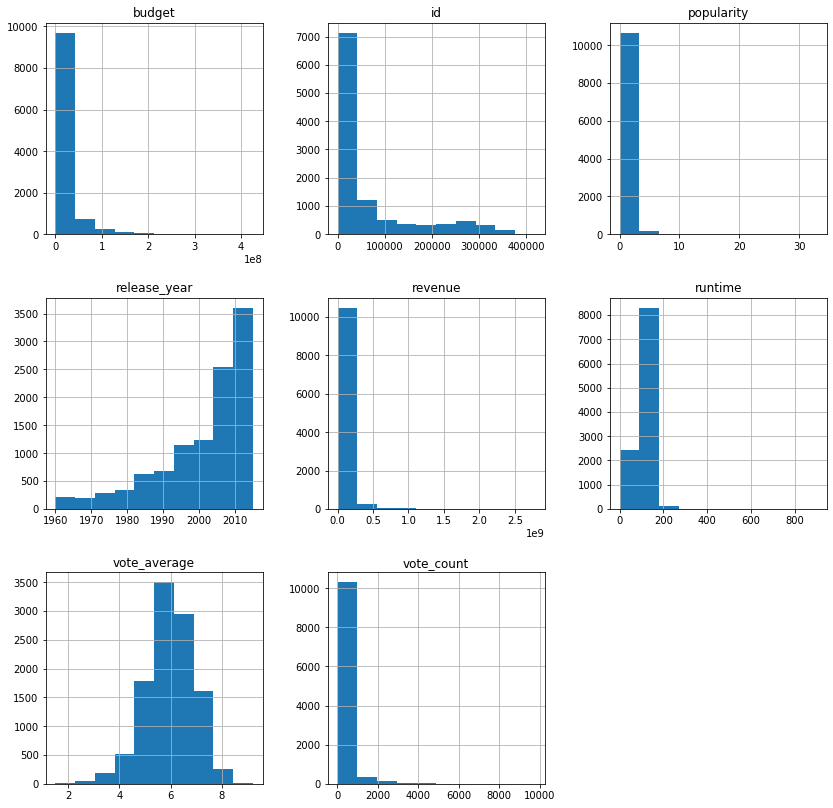

In [19]:
df.hist(figsize=(14, 14));

> From the above plots, we can see that, there are some movies with budget and revenue zero. Also, by looking at the plot of release_year, we can say that the popularity of movies increased gradually since 1960s.

<a id='eda'></a>
## Exploratory Data Analysis

> According to my understanding of the dataset, the 'Popularity' and the 'Rating', these two variables are the dependent variables and the rest are the independent variables.

### Research Question 1: What is the trend and hence, popularity of the movies over the period of time?

In [20]:
# Calculating the median for popularity for each year
popularity_median = df.groupby('release_year').median()['popularity']
#print(popularity_median)

In [21]:
# Creating the index locations
indexes = popularity_median.index
print(indexes)

Int64Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015],
           dtype='int64', name='release_year')


Text(0, 0.5, 'Popularity')

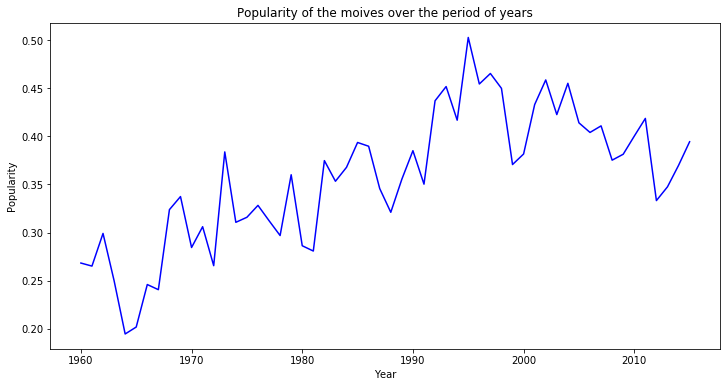

In [22]:
# Assigning the x axis and y axis data
x, y = indexes, popularity_median

plt.figure(figsize=(12, 6))

# Plotting the line chart
plt.plot(x, y, color = 'b')

# Assigning the title to the plot
plt.title('Popularity of the moives over the period of years')

# Assigning the x and y axis labels to the plot
plt.xlabel('Year')
plt.ylabel('Popularity')

> To check the trend of the popularity of the movies over the years since 1960 to 2015, I calculated the median of the popularity, in order to nullify, if any, effects of the outliers in the values of the popularity. I have plotted this trend, and from the above plot we can see that the popularity of the movies has been increasing over the period. This is obvious as the ways to have access to the movies developed over the time. Also, with the increased work pressure, people do look out for options to give themselves some break to realx and entertain, and movies seem to be easy option nowadays!

### Research Question 2: In which year the movie release count was highest?

In [23]:
# Calculating the movie count according to release year
movie_count = df.groupby('release_year').count()['id']
#print(movie_count)

Text(0, 0.5, 'Movie count')

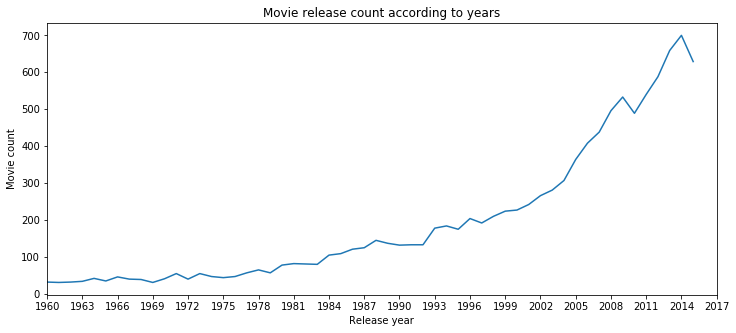

In [24]:
# Setting the size for plot
plt.figure(figsize=(12, 5))

# Grouping the dataframe by release year and plotting the data
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960, 2018, 3))

# Setting the title for the plot
plt.title("Movie release count according to years")

# Setting the x and y axes label titles
plt.xlabel('Release year')
plt.ylabel('Movie count')

> From the above plot, we can see that the count of movies benig released kept on increasing gradually over the years. The increase actually hyped after 1999. The highest number of releases being in the year 2014, which is around 700. 

### Research Question 3: Which are the movies with highest and least budgets? 

In [25]:
# Calculating the maximum value of the budget
highest_budget_index = df['budget'].idxmax()
#print(highest_budget_index)

# Calculating the minimum value of the budget
least_budget_index = df['budget'].idxmin()
#print(least_budget_index)

# Creating a dataframe including the record with maximum budget only
highest_budget = pd.DataFrame(df.loc[highest_budget_index, :])

# Creating a dataframe including the record with minimum budget only
lowest_budget = pd.DataFrame(df.loc[least_budget_index, :])

# Displaying the maximum and the minimum budget movie title and the budget amount
print("Movie with highest budget is: " + str(df['original_title'][highest_budget_index]) + ". Budget is: " + str(highest_budget_index))
print("Movie with least budget is: " + str(df['original_title'][least_budget_index]) + ". Budget is: " + str(least_budget_index))

Movie with highest budget is: The Warrior's Way. Budget is: 2244
Movie with least budget is: Mr. Holmes. Budget is: 30


### Research Question 4: Which are the movies with highest and least revenues? 

In [26]:
# Calculating the maximum value of the revenue
highest_revenue_index = df['revenue'].idxmax()
#print(highest_revenue_index)

# Calculating the minimum value of the revenue
least_revenue_index = df['revenue'].idxmin()
#print(least_revenue_index)

# Creating a dataframe including the record with maximum revenue only
highest_revenue = pd.DataFrame(df.loc[highest_revenue_index, :])

# Creating a dataframe including the record with minimum revenue only
lowest_revenue = pd.DataFrame(df.loc[least_revenue_index, :])

# Displaying the maximum and the minimum revenue movie title and the revenue amount
print("Movie with highest revenue is: " + str(df['original_title'][highest_revenue_index]) + ". Revenue is: " + str(highest_revenue_index))
print("Movie with least revenue is: " + str(df['original_title'][least_revenue_index]) + ". Revenue is: " + str(least_revenue_index))

Movie with highest revenue is: Avatar. Revenue is: 1386
Movie with least revenue is: Wild Card. Revenue is: 48


### Research Question 5: Which are the movies with highest and least profits? 

In [27]:
# Calculating and adding an additional column of profit in the dataframe
df['profit'] = df['revenue'] - df['budget']
print(df['profit'].head())

0    1363528810
1     228436354
2     185238201
3    1868178225
4    1316249360
Name: profit, dtype: int64


In [28]:
# Calculating the maximum value of the profit
highest_profit_index = df['profit'].idxmax()
#print(highest_profit_index)

# Calculating the minimum value of the profit
least_profit_index = df['profit'].idxmin()
#print(least_profit_index)

# Creating a dataframe including the record with maximum profit only
highest_profit = pd.DataFrame(df.loc[highest_profit_index, :])

# Creating a dataframe including the record with minimum profit only
lowest_profit = pd.DataFrame(df.loc[least_profit_index, :])

# Displaying the maximum and the minimum profit movie title and the profit amount
print("Movie with highest profit is: " + str(df['original_title'][highest_profit_index]) + ". Profit is: " + str(highest_profit_index))
print("Movie with least profit is: " + str(df['original_title'][least_profit_index]) + ". Profit is: " + str(least_profit_index))

Movie with highest profit is: Avatar. Profit is: 1386
Movie with least profit is: The Warrior's Way. Profit is: 2244


### Research Question 6: Which are the movies with highest and least number of votes? 

In [29]:
# Calculating the maximum number of votes
highest_vote_count_index = df['vote_count'].idxmax()
#print(highest_vote_count_index)

# Calculating the minimum number of votes
least_vote_count_index = df['vote_count'].idxmin()
#print(least_vote_count_index)

# Creating a dataframe including the record with maximum number of votes only
highest_vote_count = pd.DataFrame(df.loc[highest_vote_count_index, :])

# Creating a dataframe including the record with minimum number of votes only
lowest_vote_count = pd.DataFrame(df.loc[least_vote_count_index, :])

# Displaying the maximum and the minimum number of votes, movie title and the vote count
print("Movie with highest number of votes is: " + str(df['original_title'][highest_vote_count_index]) + ". Number of votes is: " + str(highest_vote_count_index))
print("Movie with least number of votes is: " + str(df['original_title'][least_vote_count_index]) + ". Number of votes is: " + str(least_vote_count_index))

Movie with highest number of votes is: Inception. Number of votes is: 1919
Movie with least number of votes is: The Unspoken. Number of votes is: 240


### Research Question 7: Which are the top 5 movies with highest budget? 

Text(0, 0.5, 'Movie Names')

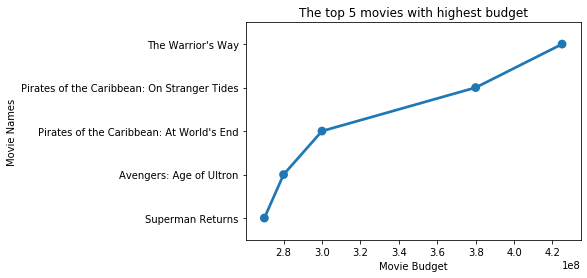

In [30]:
# Creating a dataframe by sorting the values in the budget column in the descending order
df1 = pd.DataFrame(df['budget'].sort_values(ascending = False))
df1['original_title'] = df['original_title']
df1_data = list(map(str, (df1['original_title'])))
#print(df1_data)

# Creating a list of top five movie names
movie_names = list(df1_data[:5])

# Creating a list of top five movie budgets
movie_budget = list(df1['budget'][:5])

# Plotting the movie names and the movie budgets
ax = sns.pointplot(x = movie_budget, y = movie_names)

# Setting the title for the plot
ax.set_title("The top 5 movies with highest budget")

# Setting the x and y axes labels for the plot
ax.set_xlabel("Movie Budget")
ax.set_ylabel("Movie Names")

> From the above plot, we can see that, the movies: The Warrior's Way, Pirates of the Caribbean: On Stranger Tides, Pirates of the Caribbean: At World's End, Avengers: Age of Ultron, and Superman Returns, have the highest budget of all the movies since 1960, till 2015.

### Research Question 8: Which are the top 5 movies with highest revenues? 

Text(0, 0.5, 'Movie Names')

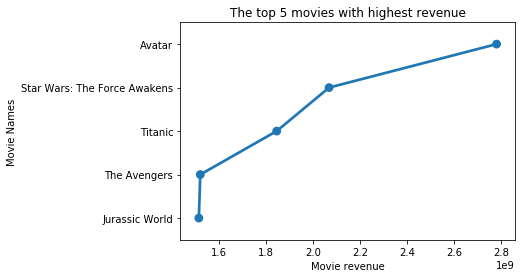

In [31]:
# Creating a dataframe by sorting the values in the revenue column in the descending order
df2 = pd.DataFrame(df['revenue'].sort_values(ascending = False))
df2['original_title'] = df['original_title']
df2_data = list(map(str, (df2['original_title'])))
#print(df2_data)

# Creating a list of top five movie names
movie_names = list(df2_data[:5])

# Creating a list of top five movie revenues
movie_revenue = list(df2['revenue'][:5])

# Plotting the movie names and the movie revenues
ax = sns.pointplot(x = movie_revenue, y = movie_names)

# Setting the title for the plot
ax.set_title("The top 5 movies with highest revenue")

# Setting the x and y axes labels for the plot
ax.set_xlabel("Movie revenue")
ax.set_ylabel("Movie Names")

> From the above plot, we can see that, the movies: Avatar, Star Wars: The Force Awakens, Titanic, The Avengers, and Jurassic Worldl, have the highest revenues of all the movies since 1960, till 2015.

### Research Question 9: Which are the top 5 movies with highest profits? 

Text(0, 0.5, 'Movie Names')

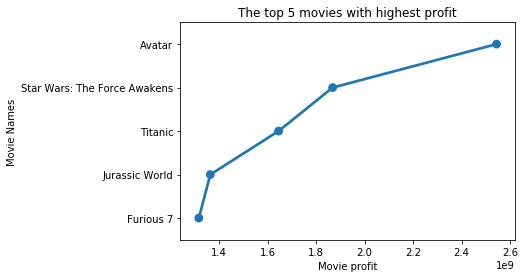

In [32]:
# Creating a dataframe by sorting the values in the profit column in the descending order
df3 = pd.DataFrame(df['profit'].sort_values(ascending = False))
df3['original_title'] = df['original_title']
df3_data = list(map(str, (df3['original_title'])))
#print(df2_data)

# Creating a list of top five movie names
movie_names = list(df3_data[:5])

# Creating a list of top five movie profits
movie_profit = list(df3['profit'][:5])

# Plotting the movie names and the movie profits
ax = sns.pointplot(x = movie_profit, y = movie_names)

# Setting the title for the plot
ax.set_title("The top 5 movies with highest profit")

# Setting the x and y axes labels for the plot
ax.set_xlabel("Movie profit")
ax.set_ylabel("Movie Names")

> From the above plot, we can see that, the movies: Avatar, Star Wars: The Force Awakens, Titanic, Jurassic World, and Furious 7, have earned the highest profit of all the movies since 1960, till 2015.

### Research Question 10: Which are the top 5 movies with the highest number of votes?

Text(0, 0.5, 'Movie Names')

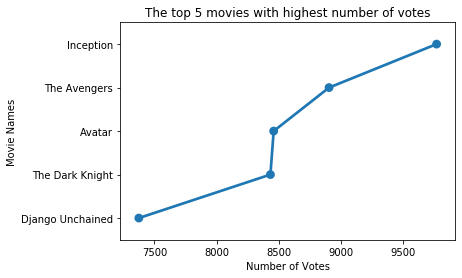

In [33]:
# Creating a dataframe by sorting the values in the vote_count column in the descending order
df4 = pd.DataFrame(df['vote_count'].sort_values(ascending = False))
df4['original_title'] = df['original_title']
df4_data = list(map(str, (df4['original_title'])))
#print(df4_data)

# Creating a list of top five movie names
movie_names = list(df4_data[:5])

# Creating a list of top five movie vote count
movie_vote_count = list(df4['vote_count'][:5])

# Plotting the movie names and the movie vote count
ax = sns.pointplot(x = movie_vote_count, y = movie_names)

# Setting the title for the plot
ax.set_title("The top 5 movies with highest number of votes")

# Setting the x and y axes labels for the plot
ax.set_xlabel("Number of Votes")
ax.set_ylabel("Movie Names")

> From the above plot, we can see that, the movies: Inception, The Avengers, Avatar, The Dark Knight, and Django Unchained, have the highest number of votes of all the movies since 1960, till 2015.

<a id='conclusions'></a>
## Conclusions

> 1. From Research question 1, we conclude that, the popularity did increased over the period of years.
> 2. From Research question 2, we conclude that, in the year 2014, there were highest number of movies released.
> 3. From Research question 3, we conclude that, the movie with highest budget is, The Warrior's Way, while the movie with least budget is, Mr. Holmes.
> 4. From Research question 4, we conclude that, the movie with highest revenue is, Avatar, while the movie with least revenue is, Wild Card. 
> 5. From Research question 5, we conclude that, the movie with highest profit is, Avatar, while the movie with least profit is, The Warrior's Way.
> 6. From Research question 6, we conclude that, the movie with highest number of votes is, Inception, while the movie with least number of votes is, The Unspoken.
> 7. From Research question 7, we conclude that, The Warrior's Way, Pirates of the Caribbean: On Stranger Tides, Pirates of the Caribbean: At World's End, Avengers: Age of Ultron, and Superman Returns, are the top five movies with the highest budget.
> 8. From Research question 8, we conclude that, Avatar, Star Wars: The Force Awakens, Titanic, The Avengers, and Jurassic World, are the top five movies with the highest revenues.
> 9. From Research question 9, we conclude that, Avatar, Star Wars: The Force Awakens, Titanic, Jurassic World, and Furious 7, are the top five movies that have earned the highest profit.
> 10. From Research question 10, we conclude that, Inception, The Avengers, Avatar, The Dark Knight, and Django Unchained, are the movies that have the highest number of votes.

## Limitations

> 1. There are null values represented with zeros for the budget and the revenue columns. This might affect the results we got for the research questions. If these values are inserted into the dataset, at some point in future, the answers to the research questions might be different.
> 2. Also, the metrics of the buget, revenue, popularity are not clear.
> 3. Popularity has no upper bounds, so it feels like for some values, they are outliers, but thinking practically there might be some movies who perform exceedingly well, but having a reason based on the statistics or some calculation being done using the dataset will validate this and will be easier to accept.

# References

[1] https://www.geeksforgeeks.org/split-a-text-column-into-two-columns-in-pandas-dataframe/